In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

In [2]:
#importing dataset
train = pd.read_excel(r'C:/Users/30016142/Model_File_Unit-7_June_2021.xlsx')

In [3]:
train.head(3)

,Date,Load_Variation_in_last_2H,Both Top Mill Running,Both Bottam Mill Running,Mill Outlet temp>60 Deg,SH_Spray-Stage1,SH_Spray-Stage2,Rh Dmaper Position>70,Sootblowing status,Excess Air,...,ASH,VM,FC,GCV,C %,H %,Majority Coal,Majority Coal%,MS Temp L-R diff,MS Temp>565
0,2020-04-01 00:00:00,0.000000,0,0,1,30.419305,0.000000,1,0,37.830733,...,3.44,32.67,30.8,4279,47.281281,2.592746,GAR,80,3.626963,0
1,2020-04-01 02:00:00,0.866324,0,0,1,32.274589,0.000000,1,0,36.837984,...,3.44,32.67,30.8,4279,47.281281,2.592746,GAR,80,2.532919,1
2,2020-04-01 04:00:00,27.035854,0,0,1,34.732485,6.971003,1,0,27.721178,...,3.44,32.67,30.8,4279,47.281281,2.592746,GAR,80,2.950115,1


In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2695 entries, 0 to 2694
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       2695 non-null   datetime64[ns]
 1   Load_Variation_in_last_2H  2693 non-null   float64       
 2   Both Top Mill Running      2695 non-null   int64         
 3   Both Bottam Mill Running   2695 non-null   int64         
 4   Mill Outlet temp>60 Deg    2695 non-null   int64         
 5   SH_Spray-Stage1            2695 non-null   float64       
 6   SH_Spray-Stage2            2695 non-null   float64       
 7   RH Dmaper Position>70      2695 non-null   int64         
 8   Sootblowing status         2695 non-null   int64         
 9   Excess Air                 2695 non-null   float64       
 10  Excess Air>25              2695 non-null   int64         
 11  LTRH Outlet FG L-R gap     2695 non-null   float64       
 12  Eco Ou

In [4]:
#converting Load variation % into numbers and dropping date feature
train = train.drop('Date', axis = 1)

<AxesSubplot:xlabel='MS Temp>565', ylabel='count'>

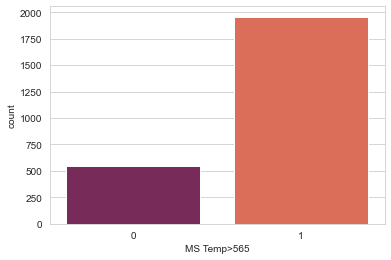

In [5]:
#understanding the class distribution
sns.set_style('whitegrid')
sns.countplot(x='MS Temp>565',data=train,palette='rocket')

In [9]:
#getting dummy values for coal type
train = pd.get_dummies(train)

In [10]:
#Profilling report
from pandas_profiling import ProfileReport
profile = ProfileReport(train)
profile.to_file("June_2020_21.html")

Summarize dataset:   0%|          | 0/37 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
train

,Load_Variation_in_last_2H,Both Top Mill Running,Both Bottam Mill Running,Mill Outlet temp>60 Deg,SH_Spray-Stage1,SH_Spray-Stage2,Rh Dmaper Position>70,Sootblowing status,Excess Air,Excess Air>25,...,VM,FC,GCV,C %,H %,Majority Coal%,MS Temp L-R diff,MS Temp>565,Majority Coal_GAR,Majority Coal_MEL
0,0.000000,0,0,1,30.419305,0.000000,1,0,37.830733,1,...,32.67,30.80,4279,47.281281,2.592746,80,3.626963,0,1,0
1,0.866324,0,0,1,32.274589,0.000000,1,0,36.837984,1,...,32.67,30.80,4279,47.281281,2.592746,80,2.532919,1,1,0
2,27.035854,0,0,1,34.732485,6.971003,1,0,27.721178,1,...,32.67,30.80,4279,47.281281,2.592746,80,2.950115,1,1,0
3,30.809757,0,1,1,26.299587,6.764021,1,1,23.339367,0,...,32.67,30.80,4279,47.281281,2.592746,80,10.138214,0,1,0
4,52.166918,0,0,0,28.127288,0.000000,1,0,35.838019,1,...,32.67,30.80,4279,47.281281,2.592746,80,1.125899,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501,15.883418,1,0,1,15.035614,27.078189,0,0,18.971260,0,...,32.41,31.97,4426,48.252321,2.623342,50,0.238773,1,0,1
2502,7.262405,1,0,1,15.260042,23.357544,0,0,18.633312,0,...,32.41,31.97,4426,48.252321,2.623342,50,3.979690,1,0,1
2503,32.141532,1,1,1,16.067009,24.990541,0,1,17.150479,0,...,32.41,31.97,4426,48.252321,2.623342,50,2.377257,0,0,1
2504,13.987867,1,1,1,14.936313,6.683787,0,1,22.494253,0,...,32.03,31.90,4372,47.926916,2.580989,50,1.978051,1,0,1


In [12]:
train.fillna(0, inplace=True)

In [13]:
# Spliting data for training the model. for Train test purpose
from sklearn.model_selection import train_test_split as tts
X = train.drop('MS Temp>565', axis = 1)
y = train['MS Temp>565']
X_train, X_test, Y_train, Y_test = tts(X, y, test_size=0.40,random_state=42)

In [14]:
#Modelling

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_predtrain = dt.predict(X_train)
y_pred= dt.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print("total Observation",len(X_test))
print("Accuracy on Train data:",accuracy_score(Y_train,Y_predtrain))
print("Accuracy on Test data:",accuracy_score(Y_test,y_pred))
print("Confusion Matrix:",confusion_matrix(Y_test,y_pred))   

total Observation 1003
Accuracy on Train data: 1.0
Accuracy on Test data: 0.847457627118644
Confusion Matrix: [[159  74]
 [ 79 691]]


In [15]:
#Finding the most important features
dt.feature_importances_

array([0.06811711, 0.00144177, 0.00200818, 0.00449101, 0.0362996 ,
       0.09377547, 0.00188909, 0.00629229, 0.00841377, 0.00568983,
       0.05602814, 0.03774505, 0.01284931, 0.02335468, 0.00724856,
       0.02025977, 0.01365952, 0.02108666, 0.03391281, 0.01095415,
       0.52360507, 0.01087816, 0.        ])

Text(0.5, 0, 'Decision Tree Feature Importance')

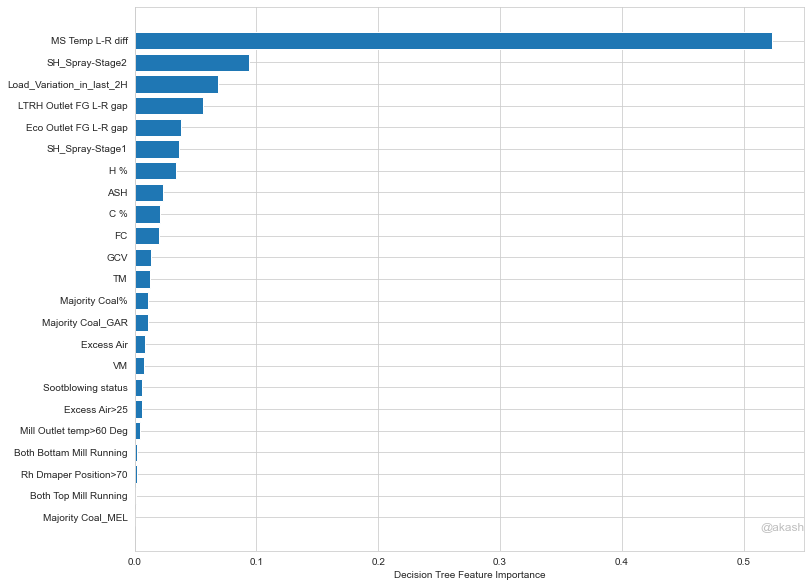

In [16]:
#visulizing feature importance

fig, ax = plt.subplots(figsize=(12,10))
fig.text(0.9, 0.15, '@akash', fontsize=12, color='grey',
         ha='right', va='bottom', alpha=0.5)
sorted_idx = dt.feature_importances_.argsort()
plt.barh(X_train.columns.values[sorted_idx], dt.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

In [17]:
ip = list(zip(dt.feature_importances_,X_train.columns.values))
op = pd.DataFrame(ip,columns=["Importance_2020_21","Feature_Name_2020_21"])

In [18]:
op.to_excel("feature_2020_21.xlsx")

In [20]:
from sklearn.inspection import permutation_importance
r = permutation_importance(dt,X_test,Y_test,
                            n_repeats=30,
                            random_state=0)


In [28]:
 for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"{train.columns[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

MS Temp L-R diff0.167 +/- 0.011
H %     0.042 +/- 0.006
SH_Spray-Stage20.036 +/- 0.007
GCV     0.010 +/- 0.003
Load_Variation_in_last_2H0.009 +/- 0.004


In [27]:
train.columns

Index(['Load_Variation_in_last_2H', 'Both Top Mill Running',
       'Both Bottam Mill Running', 'Mill Outlet temp>60 Deg',
       'SH_Spray-Stage1', 'SH_Spray-Stage2', 'Rh Dmaper Position>70',
       'Sootblowing status', 'Excess Air', 'Excess Air>25',
       'LTRH Outlet FG L-R gap', 'Eco Outlet FG L-R gap', 'TM', 'ASH', 'VM',
       'FC', 'GCV', 'C %', 'H %', 'Majority Coal%', 'MS Temp L-R diff',
       'MS Temp>565', 'Majority Coal_GAR', 'Majority Coal_MEL'],
      dtype='object')